In [1]:
# import modules
# importing libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
from scipy.ndimage import interpolation as inter


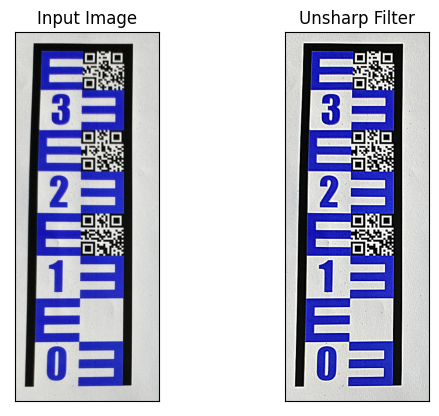

In [15]:
image = cv2.imread('TestImg/testImg_1-1.png') # reads the image
image = Image.fromarray(image.astype('uint8'))
new_image = image.filter(ImageFilter.UnsharpMask(radius=2, percent=150))
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(new_image, cmap = 'gray')
plt.title('Unsharp Filter'), plt.xticks([]), plt.yticks([])
plt.show()

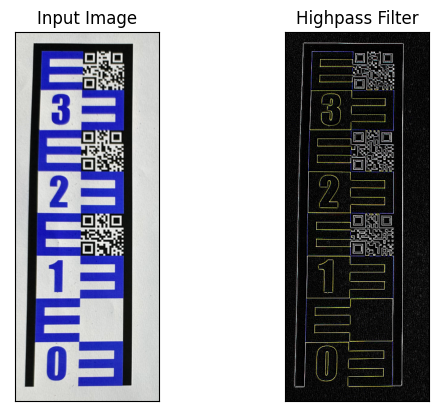

In [18]:
img_src = cv2.imread('TestImg/testImg_1-1.png') # reads the image

#edge detection filter
kernel = np.array([[-1, -1.0, -1], 
                   [-1.0, 8.0, -1.0],
                   [-1, -1.0, -1]])

kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)

#filter the source image
img_rst = cv2.filter2D(img_src,-1,kernel)

plt.subplot(121),plt.imshow(img_src, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_rst, cmap = 'gray')
plt.title('Highpass Filter'), plt.xticks([]), plt.yticks([])
plt.show()

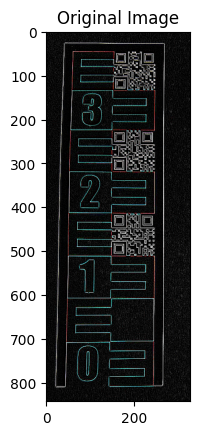

In [19]:
image = img_rst
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('Original Image')
plt.show()

In [20]:
def apply_filter(image):
    """
    Define a 5X5 kernel and apply the filter to gray scale image
    Args:
        image: np.array
    Returns:
        filtered: np.array
    """
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    kernel = np.ones((5, 5), np.float32) / 15
    filtered = cv2.filter2D(gray, -1, kernel)
    plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))
    plt.title('Filtered Image')
    plt.show()
    return filtered

def apply_threshold(filtered):
    """
    Apply OTSU threshold
    Args:
        filtered: np.array
    Returns:
        thresh: np.array
    """
    ret, thresh = cv2.threshold(filtered, 250, 255, cv2.THRESH_OTSU)
    plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
    plt.title('After applying OTSU threshold')
    plt.show()
    return thresh

def detect_contour(img, image_shape):
    """
    Args:
        img: np.array()
        image_shape: tuple
    Returns:
        canvas: np.array()
        cnt: list
    """
    canvas = np.zeros(image_shape, np.uint8)
    contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    cnt = sorted(contours, key=cv2.contourArea, reverse=True)[0]
    cv2.drawContours(canvas, cnt, -1, (0, 255, 255), 3)
    plt.title('Largest Contour')
    plt.imshow(canvas)
    plt.show()

    return canvas, cnt


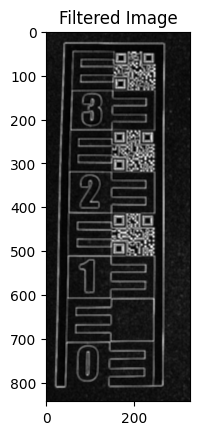

In [21]:
filteredImage = apply_filter(image)

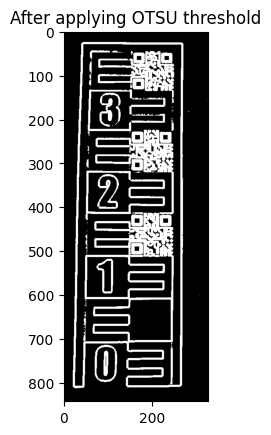

In [22]:
thresh = apply_threshold(filteredImage)

In [ ]:
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
from skimage.transform import rotate
from skimage.feature import canny
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from scipy.stats import mode

image = rgb2gray(imread("samples/doc.png"))

edges = canny(image)
# Classic straight-line Hough transform
tested_angles = np.deg2rad(np.arange(0.1, 180.0))
h, theta, d = hough_line(edges, theta=tested_angles)

# Generating figure 1
fig, axes = plt.subplots(1, 2, figsize=(15, 16))
ax = axes.ravel()

ax[0].imshow(image, cmap="gray")
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(edges, cmap="gray")
origin = np.array((0, image.shape[1]))

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[1].plot(origin, (y0, y1), '-r')
    
ax[1].set_xlim(origin)
ax[1].set_ylim((edges.shape[0], 0))
ax[1].set_axis_off()
ax[1].set_title('Detected lines')

def skew_angle_hough_transform(image):
    # convert to edges
    edges = canny(image)
    # Classic straight-line Hough transform between 0.1 - 180 degrees.
    tested_angles = np.deg2rad(np.arange(0.1, 180.0))
    h, theta, d = hough_line(edges, theta=tested_angles)
    
    # find line peaks and angles
    accum, angles, dists = hough_line_peaks(h, theta, d)
    
    # round the angles to 2 decimal places and find the most common angle.
    most_common_angle = mode(np.around(angles, decimals=2))[0]
    
    # convert the angle to degree for rotation.
    skew_angle = np.rad2deg(most_common_angle - np.pi/2)
    return skew_angle